# <center><font color = 'green'>Simulated data for purchasing a new electric car</fon></center>

![car-reg](Images/car-reg.png)<br><p style='text-align: right;'>(Dreamstime.com, 2019)</p>

## <center><font color = 'green'>Barry Clarke</fon></center>
## <center><font color = 'green'>Programming for Data Analytics - Project - Autumn 2019</fon></center>

## Description

This repository will simulate the data for the purchasing of new hybrid and full electric cars in Ireland in the 2019. Summary car sales figures show that there has been a significant increase in Hybrid and full electric cars in 2019, when compared to 2018 sales figures (Irish Motor Industry, 2019). The trend of total sales of Hybrids + full electric cars for 2018 and 2019 can be seen below. <br> 
![New E-car sales summary](Images/E-Car-sales-summary.png)<br>
This data is of interest to the author, as his next car purchase will either be a hybrid or a full electric. Note the trend in the above plot with two peaks, one in January and one in July. This can be explained by the volume of car sales seen at the beginning of the 1st half of the year, and the beginning of the 2nd half of the year. This trend will be simulated in the Month column in the dataset below

The dataset will include the following columns:
1. **Model:** The make of car
2. **Make:** The manufacturer of the car 
3. **Classification:** The class of car 
4. **Technology** The engine type
5. **Price** The price of the car
6. **Month** The Month the car was registered
7. **Location** County where the car is registered. <font color = 'Red'>Note:</font> The dataset will only focus on Dublin and the commuter counties, as the author is a commuter and would like data relevant to his life situation
8. **colour** The colour of the car
9. **Gender:** Gender of purchaser
10. **Scrappage:** Yes/No based on whether the purchaser was availing of a scrappage deal

Within the dataset, the relationships between the variables will be discussed and simulated. The final simulated dataset will contain 1000 entries.<br>
**Note:** The simulated dataset is primarily based on summary data provided from the Irish Motor Industry Motorstats (Irish Motor Industry, 2019)

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The below data is based on the summary data for the registrations of hybrid and Electric passenger cars sold in Dublin and it's commuter counties in 2019 to end of November. This data can be viewed [here](Data/passenger-cars-by-model.xlsx)<br>

Prior to structuring and filling the dataset, it is necessary to list all possible options within each variable.

In [2]:
# List of options within each variable
model = ['Leaf', 'Kona', 'Niro', 'Zoe', 'E-Golf', 'Outlander', 'RR Sport RA', 'Ioniq', 'I3', '5 Series', 'XC90', 
        '3 Series', 'Soul', 'Countryman', 'Model S', 'XC60', 'E-Tron', 'I-Pace', 'RR', 'Model 3', 'Model X',
       'S90', 'Prius', 'Panamera', 'Mondeo', '2 Series', 'RR Evoque R', 'EQC', 'E-Class', 'Evalia', '7 Series',
       'Passat', 'Twizy', 'C-Class', 'A7', 'V90', 'Cayenne']
make = ['Nissan', 'Hyundai', 'Kia', 'Renault', 'Volkswagon', 'Mitsubishi', 'Land Rover', 'Hyundai', 'BMW', 'Volvo', 'Mini',
       'Tesla', 'Audi', 'Jaguar', 'Toyota', 'Porsche', 'Ford', 'Mercedez-Benz']
technology = ['Hybrid/Diesel', 'Hybrid/Petrol', 'Electric']
classification = ['Small', 'Medium', 'Large', 'SUV']
Price = ['Whatever']
location = ['Dublin', 'Meath', 'Louth', 'Kildare', 'Wicklow', 'Wexford', 'Carlow']
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colour = ['Grey', 'Black', 'White', 'Blue','Red', 'Other']
gender = ['Male', 'Female']
scrappage = ['Yes', 'No']

## 1. Initiate dataset with a Model column

The principal variable of the dataset will be the Model of car registered. For each sale simulated, the [numpy.random.choice()](#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html) (numpy.random.choice, 2019) function will be used, with a probability attached to each car based on the sales statistics of all cars in the data. The numpy.random.choice function is used to generate a random sample for a 1D array. So, given an array from any of the above listed variables for this dataset, the numpy.random.choice function will randomly select any element from that array. Futhermore, assigning a probability to each element will bias the random generation to produce a non-uniform distribution. For this dataset, a non uniform distribution is required, as not all cars in the dataset have the same popularity.

In [3]:
# Probabilities of each car model being registered, based on 2019 Summary data (Irish Motor Industry, 2019)
p1=[0.212, 0.220, 0.090, 0.037, 0.062, 0.046, 0.046, 0.003, 0.035, 0.027, 0.022, 0.02, 0.012, 0.013, 0.014, 0.01, 0.011, 0.012, 0.010, 0.009, 0.008, 0.009, 0.005, 0.006, 0.002, 0.002, 0.002, 0.001, 0.001, 0.0003, 0.0007, 0.0007, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003]
# numpy.random.choice() can have difficulty suming all probabilities to 1. The solution is to normalize the probabilities 
# by dividing them by their sum if the sum is close enough to 1. (stackoverflow.com, 2017)
p1 = np.array(p1)
p1 /= p1.sum()

In [4]:
# Create a dataset containing 1000 hybrid or electric cars listed in 'Model' above with probabilities 'P1' also listed above
Cars = pd.DataFrame({'Model': np.random.choice(model, 1000, p=p1)})
# View the first 10 rows of the dataset
Cars.head(10)

,Model
0,Kona
1,Kona
2,XC90
3,Zoe
4,E-Golf
5,E-Tron
6,Leaf
7,Leaf
8,Leaf
9,Leaf


Due to the probabilities assigned to each model, the distribution will be non uniform. Please see the plot below which provides the number of cars simulated for registeration in 2019. Note how the "Kona" and the "Leaf" will have the highest number of cars, in line with the statistics provided in [actual cars sales summary](Data/passenger-cars-by-model.xlsx)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

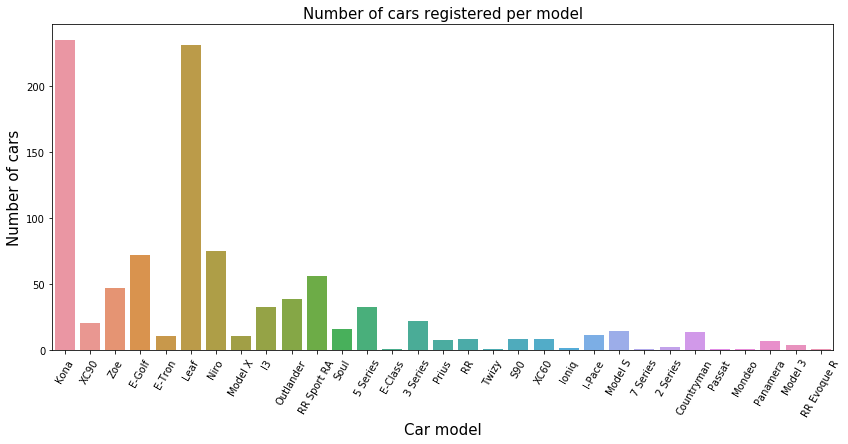

In [5]:
# Adjust the output plot sizes to be full page width (stackoverflow, 2015)
plt.rcParams['figure.figsize'] = (14,6)
# Plot the results of the simulation using the seaborn countplot function (Pydata, 2019)
sns.countplot(x='Model', data=Cars)
# Add a title and label axes
plt.title('Number of cars registered per model', size = 15)
plt.xlabel('Car model', size = 15)
plt.ylabel('Number of cars', size = 15)
# Rotate the x axis text (stackoverflow, 2019)
plt.xticks(rotation=60)

## 2. Append dataset with Make, Classification, Technology & Price columns

For each model chosen in the dataset, the model's manufacturer, model classification, and car engine technology are directly related to the model ie. they do not change in relation to the model. However, the model is randomly chosen above, so the manufacturer, classification and technology will vary across the dataset and are significant variables for which the author would like to compare and contrast in the dataset.

For each car model, there is a price estimate based on the market value obtained by an online research of all listed models. This research involved visiting all 18 car manufacturers websites, as well as various car sales wbesites. All these websites are listed in the reference section at the end of this notebook.<br> In simulating the price for each randomly chosen model, a normal distribution around the price estimate is used to reflect the price variance from dealer to dealer. The [numpy.random.normal()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html) function is used to simulate the normal distribution around the mean price for each model of car. As an illustration, below plots the normal distribution of price for 200 Nissan Leafs sold. The researched price of a Nissan Leaf is €38,000. Applying a Standard Deviation of 1000 to this price, the normal distribution of prices around €38,000 is plotted below. This is seen as an accurate estimate of price variance from car dealer to car dealer.

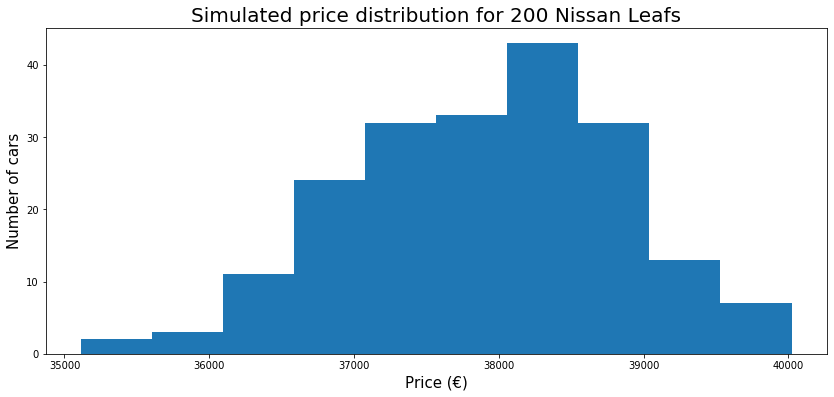

In [6]:
# Produce 1000 random samples using the randn function
leaf = np.random.normal(38000, 1000, 200)
# Plot the results of each, by histogram, side by side for comparison
plt.hist(leaf)
plt.title('Simulated price distribution for 200 Nissan Leafs', size=20)
plt.xlabel('Price (€)', size=15)
plt.ylabel('Number of cars', size=15)

plt.show()

**Note:** For the purpose of this exercise, the same normal distribution was applied to all car models. Further research could be done to obtain more accurate variance on individual car models. 

In [7]:
# For each model, assign the correct make, classification, technology, and use give an accurate estimate of the price paid.
# Use a for lopp for the dataset size of 1000
for i in range(1000):
    # Use an if loop to assign correct categories and price estimate for each car model
    if Cars.loc[i, 'Model'] == 'Leaf':
        Cars.loc[i, 'Make'] = 'Nissan'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Electric'
        # Use the numpy.random.normal() function to estimate the price of the car
        # np.random.normal(x, y, z): x = mean price, y = Std Dev of the price distribution across dealerships, 
        # z = no. of output values
        leaf = np.random.normal(38000, 1000, 1)
        # roundup the float to the nearest integer
        Cars.loc[i, 'Price'] = np.round(leaf)
    # Repeat the loop for every car model in the available for the dataset
    elif Cars.loc[i, 'Model'] == 'Kona':
        Cars.loc[i, 'Make'] = 'Hyundai'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        kona = np.random.normal(38630, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(kona)
    elif Cars.loc[i, 'Model'] == 'Niro':
        Cars.loc[i, 'Make'] = 'Kia'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        niro = np.random.normal(37495, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(niro)
    elif Cars.loc[i, 'Model'] == 'E-Golf':
        Cars.loc[i, 'Make'] = 'Volkswagen'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Electric'
        egolf = np.random.normal(42874, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(egolf)
    elif Cars.loc[i, 'Model'] == 'RR Sport RA':
        Cars.loc[i, 'Make'] = 'Land Rover'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        RRsport = np.random.normal(95000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(RRsport)
    elif Cars.loc[i, 'Model'] == 'Outlander':
        Cars.loc[i, 'Make'] = 'Mitsubishi'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        outlander = np.random.normal(45000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(outlander)
    elif Cars.loc[i, 'Model'] == 'Model 3':
        Cars.loc[i, 'Make'] = 'Tesla'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Electric'
        model3 = np.random.normal(45000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(model3)
    elif Cars.loc[i, 'Model'] == 'Zoe':
        Cars.loc[i, 'Make'] = 'Renault'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Electric'
        zoe = np.random.normal(25000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(zoe)
    elif Cars.loc[i, 'Model'] == 'I3':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Electric'
        i3 = np.random.normal(36000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(i3)
    elif Cars.loc[i, 'Model'] == 'Ioniq':
        Cars.loc[i, 'Make'] = 'Hyundai'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid or Electric'
        ioniq = np.random.normal(30000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(ioniq)
    elif Cars.loc[i, 'Model'] == '5 Series':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        series5 = np.random.normal(51000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(series5)
    elif Cars.loc[i, 'Model'] == 'XC90':
        Cars.loc[i, 'Make'] = 'Volvo'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        xc90 = np.random.normal(75000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(xc90)
    elif Cars.loc[i, 'Model'] == '3 Series':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        series3 = np.random.normal(43000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(series3)
    elif Cars.loc[i, 'Model'] == 'Model S':
        Cars.loc[i, 'Make'] = 'Tesla'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Electric'
        models = np.random.normal(96000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(models)
    elif Cars.loc[i, 'Model'] == 'Countryman':
        Cars.loc[i, 'Make'] = 'Mini'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        countryman = np.random.normal(33000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(countryman)
    elif Cars.loc[i, 'Model'] == 'I-Pace':
        Cars.loc[i, 'Make'] = 'Jaguar'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        ipace = np.random.normal(81000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(ipace)
    elif Cars.loc[i, 'Model'] == 'E-Tron':
        Cars.loc[i, 'Make'] = 'Audi'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Electric'
        etron = np.random.normal(95000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(etron)
    elif Cars.loc[i, 'Model'] == 'XC60':
        Cars.loc[i, 'Make'] = 'Volvo'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        xc60 = np.random.normal(65000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(xc60)
    elif Cars.loc[i, 'Model'] == 'Soul':
        Cars.loc[i, 'Make'] = 'Kia'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        soul = np.random.normal(36000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(soul)
    elif Cars.loc[i, 'Model'] == 'RR':
        Cars.loc[i, 'Make'] = 'Land Rover'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        RR = np.random.normal(132000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(RR)
    elif Cars.loc[i, 'Model'] == 'S90':
        Cars.loc[i, 'Make'] = 'Volvo'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        S90 = np.random.normal(49000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(S90)
    elif Cars.loc[i, 'Model'] == 'Model X':
        Cars.loc[i, 'Make'] = 'Tesla'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        modelx = np.random.normal(101000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(modelx)
    elif Cars.loc[i, 'Model'] == 'Panamera':
        Cars.loc[i, 'Make'] = 'Porsche'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        panamera = np.random.normal(119000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(panamera)
    elif Cars.loc[i, 'Model'] == 'Prius':
        Cars.loc[i, 'Make'] = 'Toyota'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        prius = np.random.normal(33000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(prius)
    elif Cars.loc[i, 'Model'] == '2 Series':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        series2 = np.random.normal(52000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(series2)
    elif Cars.loc[i, 'Model'] == 'Mondeo':
        Cars.loc[i, 'Make'] = 'Ford'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        mondeo = np.random.normal(38000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(mondeo)
    elif Cars.loc[i, 'Model'] == 'RR Evoque R':
        Cars.loc[i, 'Make'] = 'Land Rover'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        RRevoque = np.random.normal(75000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(RRevoque)
    elif Cars.loc[i, 'Model'] == 'EQC':
        Cars.loc[i, 'Make'] = 'Mercedes Benz'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Electric'
        eqc = np.random.normal(89000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(eqc)
    elif Cars.loc[i, 'Model'] == 'E-Class':
        Cars.loc[i, 'Make'] = 'Mercedes Benz'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        eclass = np.random.normal(90000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(eclass)
    elif Cars.loc[i, 'Model'] == 'Evalia':
        Cars.loc[i, 'Make'] = 'Nissan'
        Cars.loc[i, 'Classification'] = 'Family'
        Cars.loc[i, 'Technology'] = 'Electric'
        evalia = np.random.normal(35000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(evalia)
    elif Cars.loc[i, 'Model'] == 'V90':
        Cars.loc[i, 'Make'] = 'Volvo'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        v90 = np.random.normal(60000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(v90)
    elif Cars.loc[i, 'Model'] == 'Cayenne':
        Cars.loc[i, 'Make'] = 'Porsche'
        Cars.loc[i, 'Classification'] = 'SUV'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        cayenne = np.random.normal(95000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(cayenne)
    elif Cars.loc[i, 'Model'] == 'Passat':
        Cars.loc[i, 'Make'] = 'Volkswagen'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        passat = np.random.normal(42000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(passat)
    elif Cars.loc[i, 'Model'] == 'A7':
        Cars.loc[i, 'Make'] = 'Audi'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        a7 = np.random.normal(82000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(a7)
    elif Cars.loc[i, 'Model'] == '7 Series':
        Cars.loc[i, 'Make'] = 'BMW'
        Cars.loc[i, 'Classification'] = 'Large'
        Cars.loc[i, 'Technology'] = 'Hybrid'
        series7 = np.random.normal(105000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(series7)
    elif Cars.loc[i, 'Model'] == 'Twizy':
        Cars.loc[i, 'Make'] = 'Renault'
        Cars.loc[i, 'Classification'] = 'Small'
        Cars.loc[i, 'Technology'] = 'Electric'
        twizy = np.random.normal(10000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(twizy)
    elif Cars.loc[i, 'Model'] == 'C-Class':
        Cars.loc[i, 'Make'] = 'Mercedes Benz'
        Cars.loc[i, 'Classification'] = 'Medium'
        Cars.loc[i, 'Technology'] = 'Hybrid' 
        cclass = np.random.normal(111000, 1000, 1)
        Cars.loc[i, 'Price'] = np.round(cclass)

In [8]:
# Confirm the above by printing the 1st 10 entries of the dataset
Cars.head(10)

,Model,Make,Classification,Technology,Price
0,Kona,Hyundai,SUV,Electric,37528.0
1,Kona,Hyundai,SUV,Electric,38300.0
2,XC90,Volvo,SUV,Hybrid,75936.0
3,Zoe,Renault,Small,Electric,25482.0
4,E-Golf,Volkswagen,Medium,Electric,43363.0
5,E-Tron,Audi,Medium,Electric,93198.0
6,Leaf,Nissan,Small,Electric,38217.0
7,Leaf,Nissan,Small,Electric,38518.0
8,Leaf,Nissan,Small,Electric,37278.0
9,Leaf,Nissan,Small,Electric,40775.0


## 3. Append dataset with column for Month of registeration

As can be seen in summary plot at the top of the notebook, the sales figures are not spread uniformly across the year, rather they have two distinct peaks in January and July. In the remainder months the number registered fall off. The probabilities in p2 are an accurate estimate of the monthly numbers, based on the sales figures in the Irish Motor Industry data provided

In [9]:
# Probabilities of what month the car was registered
p2=[0.23, 0.11, 0.1, 0.1, 0.06, 0.03, 0.19, 0.06, 0.03, 0.06, 0.03, 0]

In [10]:
# Add a column to the dataset to simulate the monthly numbers of cars registered
Cars['Month'] = np.random.choice(month, size=1000, p=p2)

In [11]:
# Confirm new column
Cars.head(10)

,Model,Make,Classification,Technology,Price,Month
0,Kona,Hyundai,SUV,Electric,37528.0,February
1,Kona,Hyundai,SUV,Electric,38300.0,August
2,XC90,Volvo,SUV,Hybrid,75936.0,January
3,Zoe,Renault,Small,Electric,25482.0,June
4,E-Golf,Volkswagen,Medium,Electric,43363.0,April
5,E-Tron,Audi,Medium,Electric,93198.0,April
6,Leaf,Nissan,Small,Electric,38217.0,February
7,Leaf,Nissan,Small,Electric,38518.0,February
8,Leaf,Nissan,Small,Electric,37278.0,January
9,Leaf,Nissan,Small,Electric,40775.0,April


## 4. Append dataset with column for county of Registration

For commuting purposes, the author is interested in viewing the sales figures and trends for Dublin and the surrounding counties to see whether certain cars are preferred as the commuting distance varies. The location of sales is random, but with probability weights attached in line with the summary statistics p3, and appended to the dataset. Once again, the most appropriate random function to use for this data simulation is numpy.random.choice() function.

In [12]:
# Probabilities of location where car is registered
p3=[0.728, 0.057, 0.033, 0.076, 0.057, 0.034, 0.015]

In [13]:
# Add a new column to the dataset to simulate what county the car was rgistered. Use the probabilities defined in p2 above
Cars['Location'] = np.random.choice(location, size=1000, p=p3)

In [14]:
Cars.head(10)

,Model,Make,Classification,Technology,Price,Month,Location
0,Kona,Hyundai,SUV,Electric,37528.0,February,Wicklow
1,Kona,Hyundai,SUV,Electric,38300.0,August,Dublin
2,XC90,Volvo,SUV,Hybrid,75936.0,January,Dublin
3,Zoe,Renault,Small,Electric,25482.0,June,Dublin
4,E-Golf,Volkswagen,Medium,Electric,43363.0,April,Meath
5,E-Tron,Audi,Medium,Electric,93198.0,April,Dublin
6,Leaf,Nissan,Small,Electric,38217.0,February,Dublin
7,Leaf,Nissan,Small,Electric,38518.0,February,Dublin
8,Leaf,Nissan,Small,Electric,37278.0,January,Dublin
9,Leaf,Nissan,Small,Electric,40775.0,April,Dublin


## 5. Append dataset with column for colour of car

Based on the summary data provided by the Irish Motor Industry, certain colours were favoured more than others. The principal colours chosen are defined in colour = ['Grey', 'Black', 'White', 'Blue','Red', 'Other'] with the below probabilities, p4.

In [15]:
# Probabilities of colour of car
p4=[0.37, 0.18, 0.15, 0.14, 0.11, 0.05]

In [16]:
# Add a new column to the dataset to simulate  the chosen colour of car, with probabilities from defined in p4 above
Cars['Colour'] = np.random.choice(colour, size=1000, p=p4)

In [17]:
Cars.head(10)

,Model,Make,Classification,Technology,Price,Month,Location,Colour
0,Kona,Hyundai,SUV,Electric,37528.0,February,Wicklow,Blue
1,Kona,Hyundai,SUV,Electric,38300.0,August,Dublin,White
2,XC90,Volvo,SUV,Hybrid,75936.0,January,Dublin,Grey
3,Zoe,Renault,Small,Electric,25482.0,June,Dublin,Grey
4,E-Golf,Volkswagen,Medium,Electric,43363.0,April,Meath,Red
5,E-Tron,Audi,Medium,Electric,93198.0,April,Dublin,Grey
6,Leaf,Nissan,Small,Electric,38217.0,February,Dublin,Black
7,Leaf,Nissan,Small,Electric,38518.0,February,Dublin,Grey
8,Leaf,Nissan,Small,Electric,37278.0,January,Dublin,Black
9,Leaf,Nissan,Small,Electric,40775.0,April,Dublin,Black


## 6. Append dataset with simulated data for gender

When considering the gender of the purchaser, there is very little research in Ieland on the gender comparison. However in (Hedges Company, 2019) surveyed demographics of new car buyers in the US in 2019. Results of the survey showed that, among new Electric car buyers, 75% surveyed were Male and 25% Female. This precentage was the same for new hybird cars. Using these percentages, the gender of car buyer can be simulated using the numpy.random.choice() function.

In [18]:
# Add a new column to the dataset to simulate  the chosen colour of car, with probabilities from defined in p4 above
# Although already defined at the top of the notebook, re-define the variables for gender
gender = ['Male', 'Female']
# Unlike in previous uses of numpy.random.choice(), here directly use the probabilities within the function
Cars['Gender'] = np.random.choice(gender, size=1000, p=[0.75, 0.25])

In [19]:
Cars.head(10)

,Model,Make,Classification,Technology,Price,Month,Location,Colour,Gender
0,Kona,Hyundai,SUV,Electric,37528.0,February,Wicklow,Blue,Male
1,Kona,Hyundai,SUV,Electric,38300.0,August,Dublin,White,Male
2,XC90,Volvo,SUV,Hybrid,75936.0,January,Dublin,Grey,Male
3,Zoe,Renault,Small,Electric,25482.0,June,Dublin,Grey,Male
4,E-Golf,Volkswagen,Medium,Electric,43363.0,April,Meath,Red,Male
5,E-Tron,Audi,Medium,Electric,93198.0,April,Dublin,Grey,Male
6,Leaf,Nissan,Small,Electric,38217.0,February,Dublin,Black,Female
7,Leaf,Nissan,Small,Electric,38518.0,February,Dublin,Grey,Male
8,Leaf,Nissan,Small,Electric,37278.0,January,Dublin,Black,Male
9,Leaf,Nissan,Small,Electric,40775.0,April,Dublin,Black,Male


## 7. Call full dataset

In [20]:
# Call full dataset
Cars

,Model,Make,Classification,Technology,Price,Month,Location,Colour,Gender
0,Kona,Hyundai,SUV,Electric,37528.0,February,Wicklow,Blue,Male
1,Kona,Hyundai,SUV,Electric,38300.0,August,Dublin,White,Male
2,XC90,Volvo,SUV,Hybrid,75936.0,January,Dublin,Grey,Male
3,Zoe,Renault,Small,Electric,25482.0,June,Dublin,Grey,Male
4,E-Golf,Volkswagen,Medium,Electric,43363.0,April,Meath,Red,Male
5,E-Tron,Audi,Medium,Electric,93198.0,April,Dublin,Grey,Male
6,Leaf,Nissan,Small,Electric,38217.0,February,Dublin,Black,Female
7,Leaf,Nissan,Small,Electric,38518.0,February,Dublin,Grey,Male
8,Leaf,Nissan,Small,Electric,37278.0,January,Dublin,Black,Male
9,Leaf,Nissan,Small,Electric,40775.0,April,Dublin,Black,Male


## References
1. Dreamstime.com, 2019, [Online image]. Available from: https://www.dreamstime.com/stock-photos-red-new-car-sign-image4256123 [viewed 29th Nov 2019]
2. Irish Motor Industry, 2019. *Car Registrations Data up to 30/11/2019* [Online]. Available from: https: https://stats.beepbeep.ie/ [viewed 1st Dec 2019]<br>
3. SciPy.org, 2019. *numpy.random.choice* [Online]. Available from: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html. [viewed, 4th Dec 2019]<br>
4. Stackoverflow, 2015. *Change the plot size* [Online]. Available from: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
5. Pydata.org, 2019. *seaborn.countplot* [Online]. Available from: https://seaborn.pydata.org/generated/seaborn.countplot.html <br> 
6. Stackoverflow, 2019. *Rotate x axis text in oython*. Available from: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
7. Stackoverflow.com, 2017. *np-random-choice-probabilities-do-not-sum-to-1* [Online]. Avaiable from: https://stackoverflow.com/questions/46539431/np-random-choice-probabilities-do-not-sum-to-1 [ viewed 4th Dec 2019]<br>
8. Carzone, 2019, *New car prices* [Online]. Available from: https://www.carzone.ie/new-cars/
9. Hedges Company, 2019. *New car buyers demographics 2019* [Online]. Available from: https://hedgescompany.com/blog/2019/01/new-car-buyer-demographics-2019/
10. https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae
11. https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/